In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

# Kmeans

Реализуйте класс Kmeans


Алгоритм оптимизиет внутриклассовое расстояние, где в качестве функции расстояния используется квадрат евклидовой метрики.

$$\sum_{k = 1}^{K}\sum_{i = 1}^{\ell}[a(x_i) = k](x_i - c_k)^2, K - \text{кол-во классов}$$

Для начала инициализируем центры классов или рандомными объектами или специальным подбором.

Считаем в какие классы попадают объекты по формуле:
$$ a(x_i) = argmin_{1 \leq k \leq K}(x_i - c_k)^2 $$

Затем пересчитываем центры классов:

$$c_k = \frac{\sum_{i = 1}^{\ell}[a(x_i) = k] x_i}{\sum_{i = 1}^{\ell} [a(x_i) = k]}$$

Если центры не поменялись, значит мы нашли оптимальные центры классов

**Инициализация**:

* Рандомными объектами
* Певыми K объектами
* k-means++. Выбераем один рандомный центр. Затем находим расстояние от всех точек до ближайщего центра. Добавляем, в качестве нового центра, объект с самым большим расстоянием до ближайщего центра.

Протестируйте на
* make_moons() с noise от 0 до 0.2
* make_blobs() с cluster_std от 0.05 до 2
* make_circles() с noise от 0 до 1

Постройте графики точек + центры кластеров

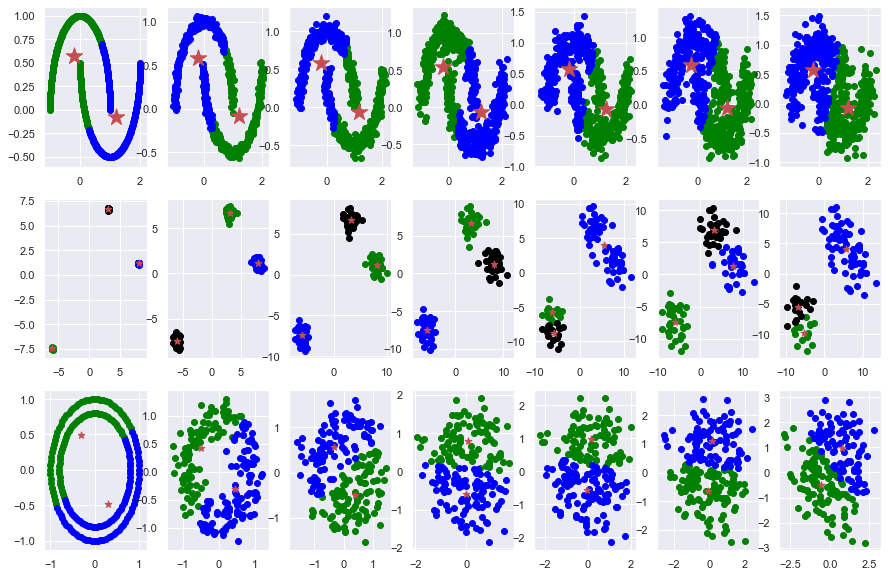

In [24]:
from k_means import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(2, type_init=1)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(3, type_init=1)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(2, type_init=1)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

Сравните с sklearn.cluster.KMeans

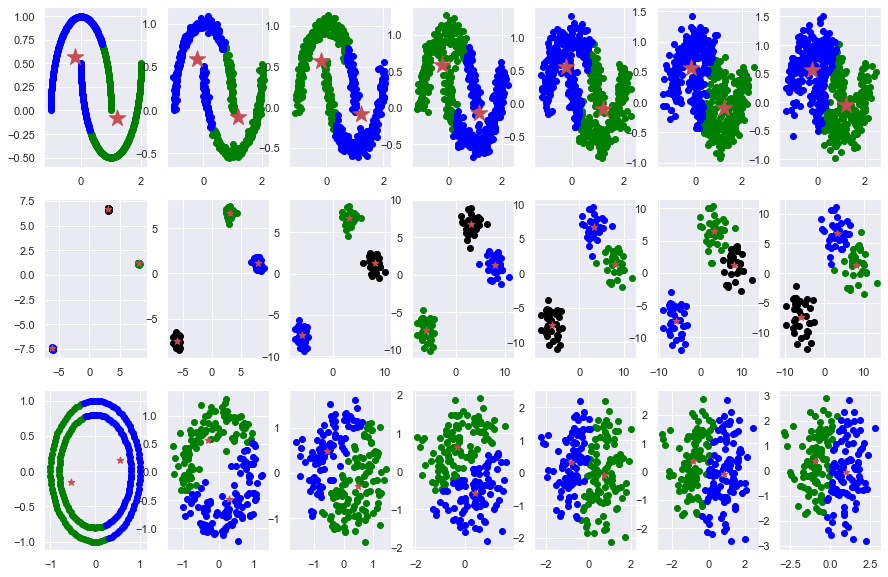

In [25]:
from sklearn.cluster import KMeans

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(n_clusters=2, init='random')
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.cluster_centers_
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(n_clusters=3, init='random')
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.cluster_centers_
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(n_clusters=2, init='random')
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.cluster_centers_
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

Сравните рандомную инцилизацию, инцилизацию первыми n_clusters и k_means++

Сделайте вывод

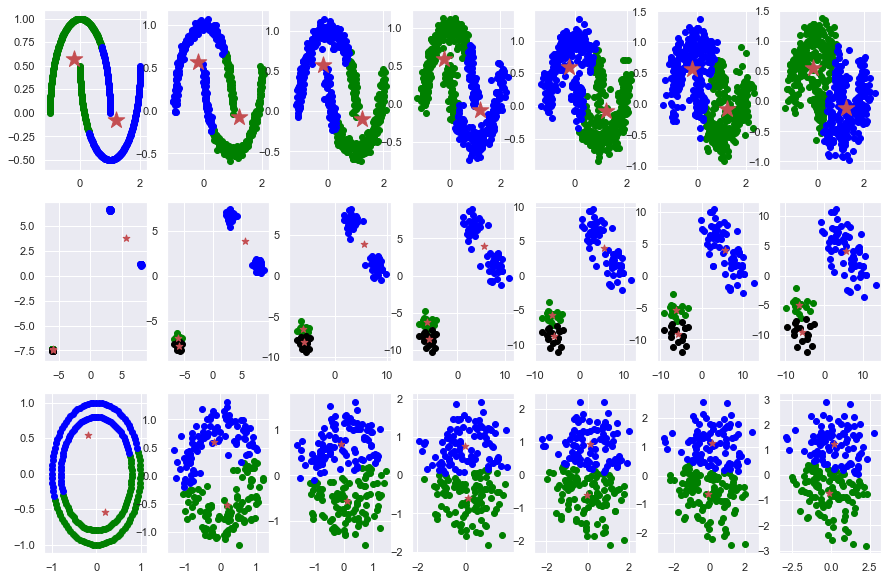

In [26]:
from k_means import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(2, type_init=0)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(3, type_init=0)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(2, type_init=0)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

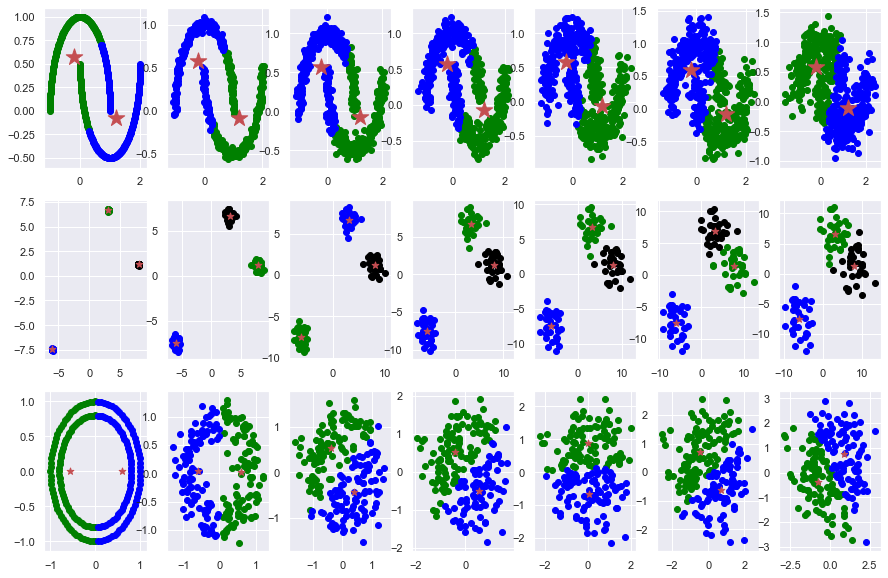

In [27]:
from k_means import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
    print('Moons silhouette score:', silhouette_score(x[0], v))
    print('Moons davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Moons v measure score:', v_measure_score(x[1], v))
    print()
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(3, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
    print('Blobs silhouette score:', silhouette_score(x[0], v))
    print('Blobs davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Blobs v measure score:', v_measure_score(x[1], v))
    print()
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    print('Circles silhouette score:', silhouette_score(x[0], v))
    print('Circles davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Circles v measure score:', v_measure_score(x[1], v))
    print()

__Вывод__ :

# BisectingKMeans, MiniBatchKMeans

Реализуйте класс BisectingKMeans, MiniBatchKMeans

Протестируйте на
* make_moons() с noise от 0 до 0.2
* make_blobs()
* make_circles()

Постройте графики точек + центры кластеров

**BisectingKMeans**

1. Сначала все данные это один класс
2. Затем делим на 2 класса, используя KMenas(2)
3. Считаем сумму квадратов евклидовых расстоянии до центра $\sum_{l=1}^{\ell}(X_i - C_k)^2$
4. Находим расстояние с самым большой суммой и повторяем 2-3

**MiniBatchKMeans**
1. Инициализируем центры
2. Выбираем рандомно m объектов
3. Находим классы этих объектов
4. Обновляем центры по формуле
$$ count_{id\_class} += 1$$
$$center_{id\_class} = (1 - 1/count_{id_class}) * center_{id\_class} +  1/count_{id\_class} * x_i$$
Повторяем 3-4 шаги несколько раз

Moons silhouette score: 0.4919692978757323
Moons davies bouldin score: 0.7789334974199238
Moons v measure score: 0.1887268119283854

Moons silhouette score: 0.49009738934866154
Moons davies bouldin score: 0.7789979528210395
Moons v measure score: 0.18884536225760182

Moons silhouette score: 0.4867631725676557
Moons davies bouldin score: 0.7830348714535184
Moons v measure score: 0.19516977657976356

Moons silhouette score: 0.4850324502739809
Moons davies bouldin score: 0.7806605481735505
Moons v measure score: 0.2019121625014566

Moons silhouette score: 0.4786334239426088
Moons davies bouldin score: 0.791328653287615
Moons v measure score: 0.18248602361335273

Moons silhouette score: 0.47447307376495
Moons davies bouldin score: 0.7972404358550187
Moons v measure score: 0.18282801284301786

Moons silhouette score: 0.4494038577216244
Moons davies bouldin score: 0.8392807862036277
Moons v measure score: 0.17632761889624163

Blobs silhouette score: 0.9888743411333979
Blobs davies bouldin sc

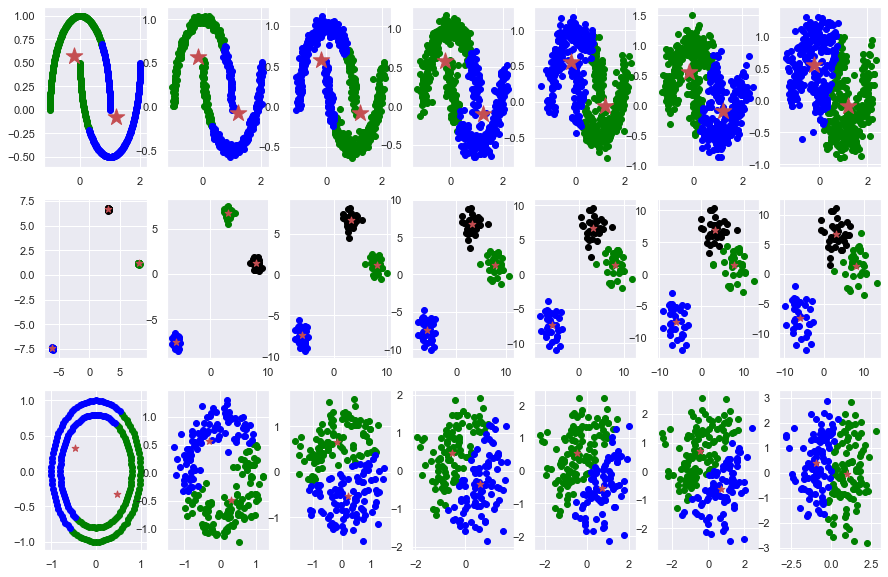

In [49]:
from bisecting_kmeans import BisectingKMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = BisectingKMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
    print('Moons silhouette score:', silhouette_score(x[0], v))
    print('Moons davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Moons v measure score:', v_measure_score(x[1], v))
    print()
    
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = BisectingKMeans(3, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
    print('Blobs silhouette score:', silhouette_score(x[0], v))
    print('Blobs davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Blobs v measure score:', v_measure_score(x[1], v))
    print()
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = BisectingKMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    print('Circles silhouette score:', silhouette_score(x[0], v))
    print('Circles davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Circles v measure score:', v_measure_score(x[1], v))
    print()

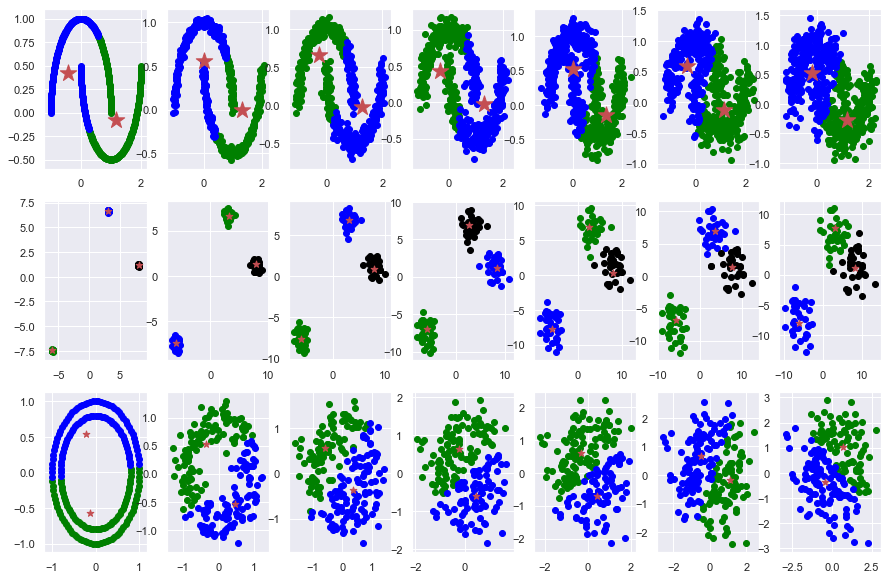

In [2]:
from minibatch_kmeans import MiniBatchKMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = MiniBatchKMeans(2, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
    print('Moons silhouette score:', silhouette_score(x[0], v))
    print('Moons davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Moons v measure score:', v_measure_score(x[1], v))
    print()
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = MiniBatchKMeans(3, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
    print('Blobs silhouette score:', silhouette_score(x[0], v))
    print('Blobs davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Blobs v measure score:', v_measure_score(x[1], v))
    print()
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = MiniBatchKMeans(2, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    print('Circles silhouette score:', silhouette_score(x[0], v))
    print('Circles davies bouldin score:', davies_bouldin_score(x[0], v))
    print('Circles v measure score:', v_measure_score(x[1], v))
    print()

Сравните время работы, точность с KMeans

In [3]:
%%time
from minibatch_kmeans import MiniBatchKMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = MiniBatchKMeans(2, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = MiniBatchKMeans(3, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = MiniBatchKMeans(2, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])

CPU times: user 554 ms, sys: 4.5 ms, total: 558 ms
Wall time: 556 ms


In [6]:
%%time
from k_means import KMeans
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(3, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])

CPU times: user 1.69 s, sys: 6.45 ms, total: 1.7 s
Wall time: 1.7 s


In [16]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

df = pd.read_csv('monsters.csv', sep=',')

def f(ans):
    if ans == 'Ghoul':
        return 0
    elif ans == 'Goblin':
        return 1
    else:
        return 2
df.type = df.type.apply(f)

feuture = df.columns.tolist()
feuture.remove('id')
feuture.remove('type')
train, test = train_test_split(df, test_size=0.3, random_state=42)
x_train = train[feuture]
y_train = train[['type']]
x_test = test[feuture]
y_test = test[['type']]

categorical = ['color']
numeric = feuture
numeric.remove('color')
column_transformer = ColumnTransformer(
    [("scaling", StandardScaler(), numeric),
     ("ohe", OneHotEncoder(), categorical)])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('KMeans', KMeans(n_clusters=3, random_state=4, init='k-means++', algorithm='elkan'))
])
kmeans = pipeline.fit(x_train)
y_pred = kmeans.predict(x_train)
print("Accuracy:", accuracy_score(y_pred, y_train))

Accuracy: 0.29343629343629346


In [17]:
y_pred

array([0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 2, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0,
       2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1], dtype=int32)

IndexError: index 3 is out of bounds for axis 0 with size 3

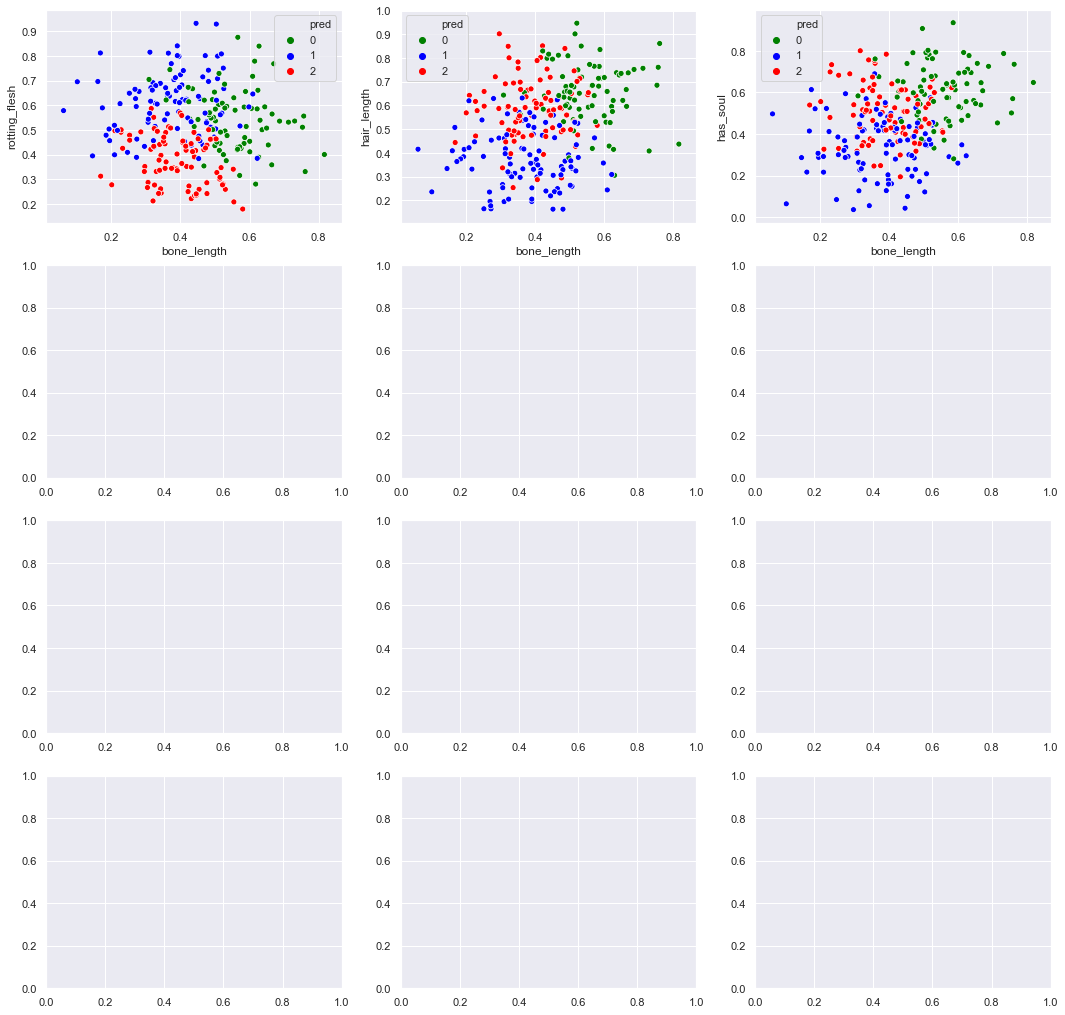

In [21]:
x_new = x_train.copy()
x_new['pred'] = y_pred
fig, axs = plt.subplots(4, 3, figsize=(18,18))
temp = x_new.columns.tolist()
k = 0
l = 0
for i in temp:
    if i == 'id' or i == 'color' or i == 'type':
        continue
    for j in temp:
        if j == 'id' or j == 'color' or j == 'type' or i == j:
            continue
        sns.scatterplot(x=i, y=j, hue="pred", data=x_new, palette=['green','blue','red'], ax=axs[k][l])
        l += 1
    k += 1
    l = 0